In [1]:
from pathlib import Path
from typing import Tuple , Union ,List
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
def get_all_img_files(dir_path : str)-> List[np.ndarray]:
    return [x for x in Path(dir_path).glob("*") if x.is_file()]

def read_imgs_from_files(files:Union[List[Path],str])-> List[np.ndarray]:
    return [cv2.imread(str(file)) for file in files]

def gray_borders(img, pool_of_gray, percent_borders):
    assert len(img.shape) == 3, 'Requires 3-Dimensional Image'
    
    height, width, _ = img.shape
    
    # Calculate the border size based on the percentage
    border_size = int(min(height, width) * (percent_borders / 100))
    
    # Copy the border regions
    horizontal_top = img[:border_size, :].copy()
    horizontal_bottom = img[height - border_size:, :].copy()
    vertical_left = img[:, :border_size].copy()
    vertical_right = img[:, width - border_size:].copy()
    
    # Assign the gray pixel values to the border regions
    img[:border_size, :] =  np.random.choice(pool_of_gray.flatten(), size=horizontal_top.size, replace=True).reshape(horizontal_top.shape)
    img[height - border_size:, :] = np.random.choice(pool_of_gray.flatten(), size=horizontal_bottom.size, replace=True).reshape(horizontal_bottom.shape)
    img[:, :border_size] = np.random.choice(pool_of_gray.flatten(), size=vertical_left.size, replace=True).reshape(vertical_left.shape)
    img[:, width - border_size:] =np.random.choice(pool_of_gray.flatten(), size=vertical_left.size, replace=True).reshape(vertical_left.shape)
    
    return img

def change_digit_color(image):
    assert len(image.shape) == 3, 'Requires 3-Dimensional Image'

    # Convert the image to grayscale
    gray = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

    # Gaussian Blur 3X3 kernel
    blurred_image = cv2.GaussianBlur(gray, (3, 3), 0)

    # Inverse Threshold the dilated image to obtain the digit region
    _, binary_image = cv2.threshold(blurred_image, 160, 255, cv2.THRESH_BINARY_INV)

    # Dilate image to fill out white region more
    kernel = np.ones((3, 3), np.uint8)
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

    # Create a mask of the binary image
    mask = cv2.cvtColor(dilated_image, cv2.COLOR_GRAY2BGR)

    # Set the pixels within the mask to red
    image[np.where((mask==[255, 255, 255]).all(axis=2))] = (255,0,0) # RGB format

    return image 

def display_im_grid(img_list):
    dim = 3
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(img_list):
        ax = plt.subplot(dim, dim, i + 1)
        plt.imshow(img_list[i],cmap= 'gray')        
        plt.title(str(i+1))
        plt.axis("off")

In [3]:
dir_path = r"C:/Users/MA51801/Documents/Projects/VisionSudokuSolver/solution_digits_templates"
img_files = get_all_img_files(dir_path)
imgs = read_imgs_from_files(img_files)

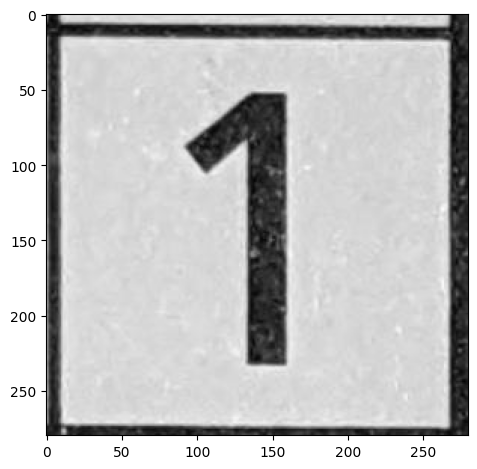

In [4]:
plt.imshow(imgs[0])
plt.tight_layout()

In [5]:
pool_of_gray = imgs[0][50:200,30:60]
gray_border_imgs = [ gray_borders(img, pool_of_gray, 10) for img in imgs]
red_numbers  = [change_digit_color(img) for img in gray_border_imgs]

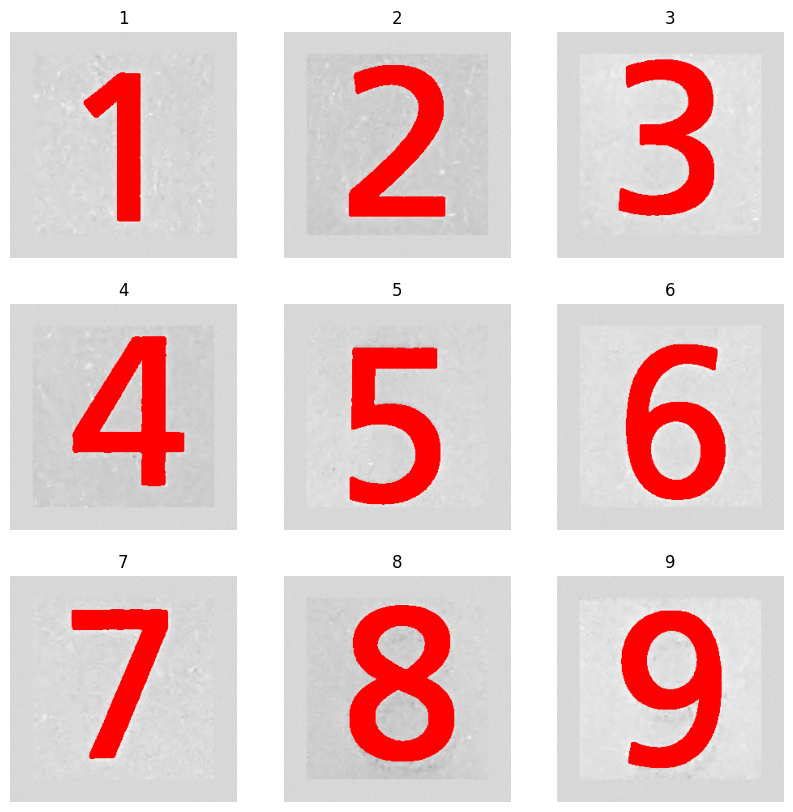

In [6]:
display_im_grid(red_numbers)

In [7]:
for label,img in enumerate(red_numbers):
    plt.imsave(f"solution_digits/{str(label + 1)}_image.jpg",img)